# Data visualization and preliminary studies

In [13]:
from platform import python_version
print("Python Version :",python_version())
import pandas as pd
import numpy as np
pd.set_option("precision",3)
#For ML Algorithms
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
seed=4
from sklearn import preprocessing
import matplotlib 
%matplotlib inline  

Python Version : 3.8.10


### Importing data 

In [14]:
data=pd.read_csv("sonar.csv",header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.020,0.037,0.043,0.021,0.095,0.099,0.154,0.160,0.311,0.211,...,0.003,0.006,0.016,0.007,0.017,0.018,0.008,0.009,0.003,R
1,0.045,0.052,0.084,0.069,0.118,0.258,0.216,0.348,0.334,0.287,...,0.008,0.009,0.005,0.009,0.019,0.014,0.005,0.005,0.004,R
2,0.026,0.058,0.110,0.108,0.097,0.228,0.243,0.377,0.560,0.619,...,0.023,0.017,0.009,0.018,0.024,0.032,0.016,0.009,0.008,R
3,0.010,0.017,0.062,0.021,0.021,0.037,0.110,0.128,0.060,0.126,...,0.012,0.004,0.015,0.009,0.007,0.005,0.004,0.004,0.012,R
4,0.076,0.067,0.048,0.039,0.059,0.065,0.121,0.247,0.356,0.446,...,0.003,0.005,0.011,0.011,0.002,0.007,0.005,0.011,0.009,R


In [15]:
print(data.shape)

(208, 61)


In [16]:
#This is a classification problem. 
#It can be useful to check the class distribution
data.groupby(data.columns[-1]).size()

60
M    111
R     97
dtype: int64

### Splitting into Train set and Test set
#### This is done here in order to not look at the test set at all.

In [17]:
X=np.array(data.iloc[:,:-1])
Y=np.array(data[60])
#Convert M->0, R->1
Label_Encoder = preprocessing.LabelEncoder()
Y=Label_Encoder.fit_transform(Y)

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=seed)
data_array=np.c_[X_train,Y_train]
rock_features=data_array[data_array[:,-1]==1][:,:-1]
mine_features=data_array[data_array[:,-1]==0][:,:-1]
print("Dataset Shape:" ,X.shape)
print("Train-set Shape:" ,X_train.shape)
print("Test-set Shape:" ,X_test.shape)

Dataset Shape: (208, 60)
Train-set Shape: (166, 60)
Test-set Shape: (42, 60)


### Data Visualization

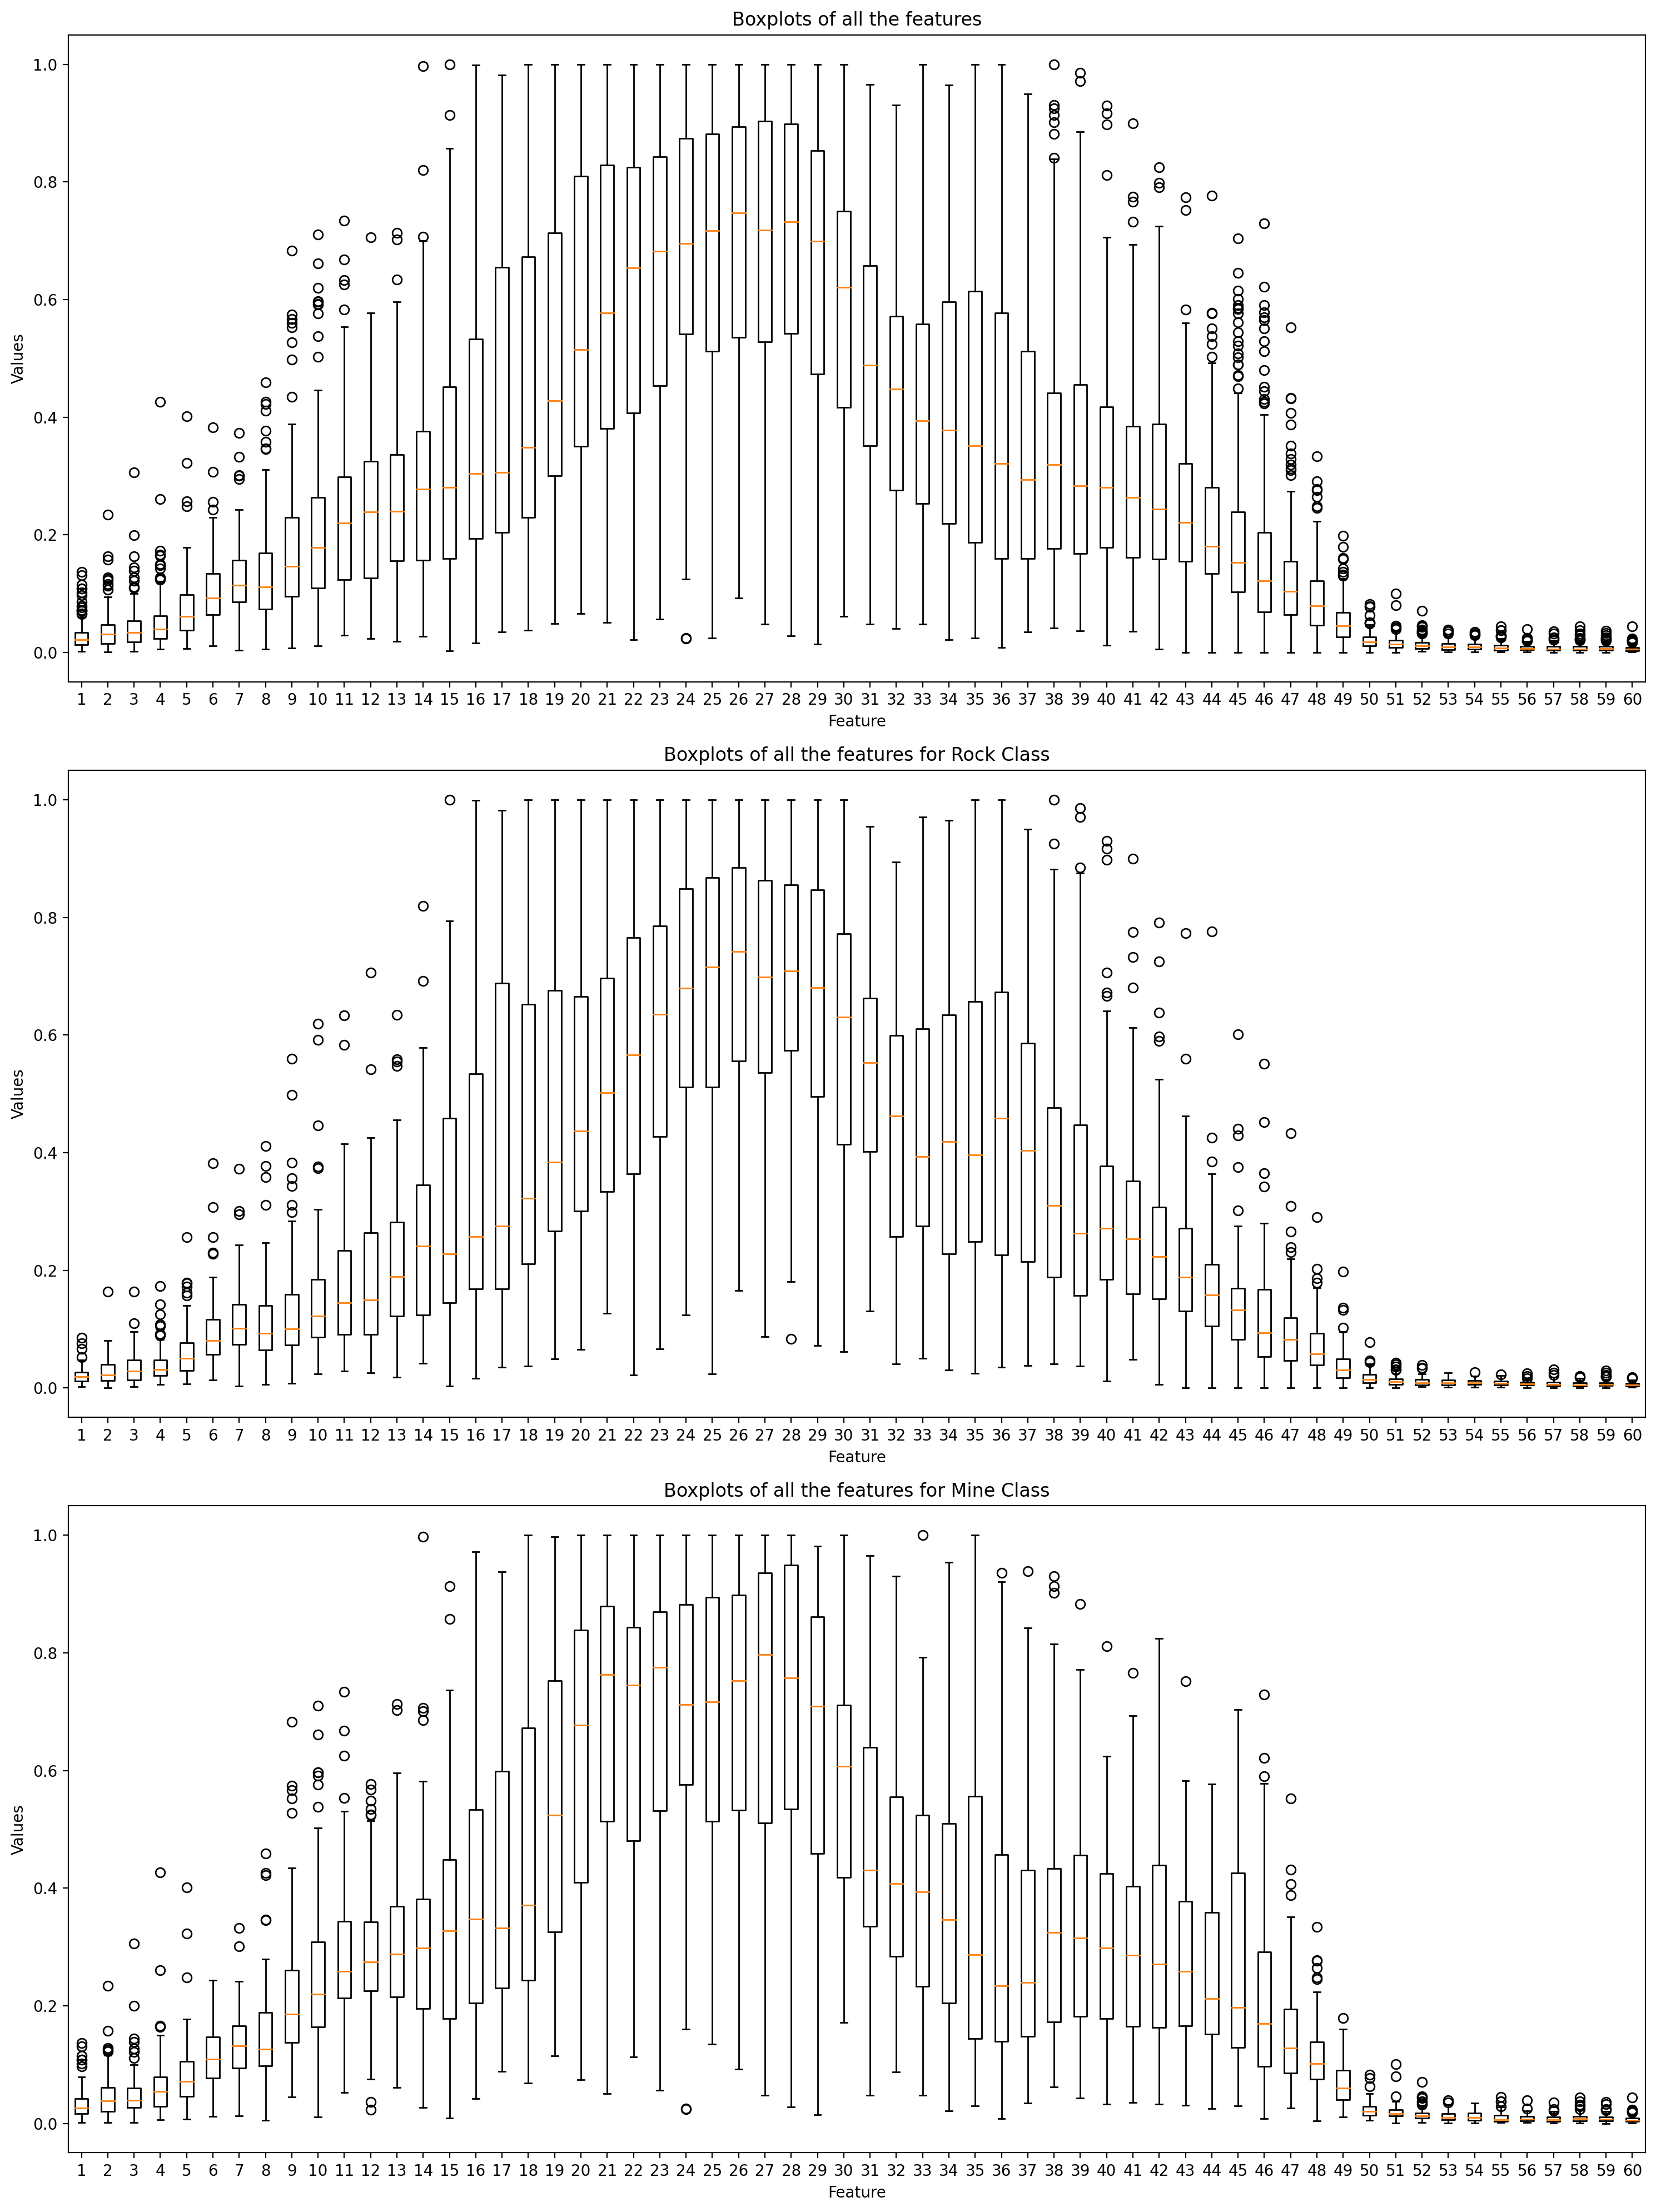

In [19]:
#Box Plot to check Data Normalization and possible outliers
fig = plt.figure(figsize=(15, 20))
ax = fig.add_subplot(311)
ax1 = fig.add_subplot(312)
ax2 = fig.add_subplot(313)
fig.set_dpi(200)
#fig.figsize(10,5)
ax.boxplot(X_train)
ax.set_title("Boxplots of all the features")
ax.set_xlabel('Feature')
ax.set_ylabel('Values')
ax1.boxplot(rock_features)
ax1.set_title("Boxplots of all the features for Rock Class")
ax1.set_xlabel('Feature')
ax1.set_ylabel('Values')
ax2.boxplot(mine_features)
ax2.set_title("Boxplots of all the features for Mine Class")
ax2.set_xlabel('Feature')
ax2.set_ylabel('Values')
plt.tight_layout()

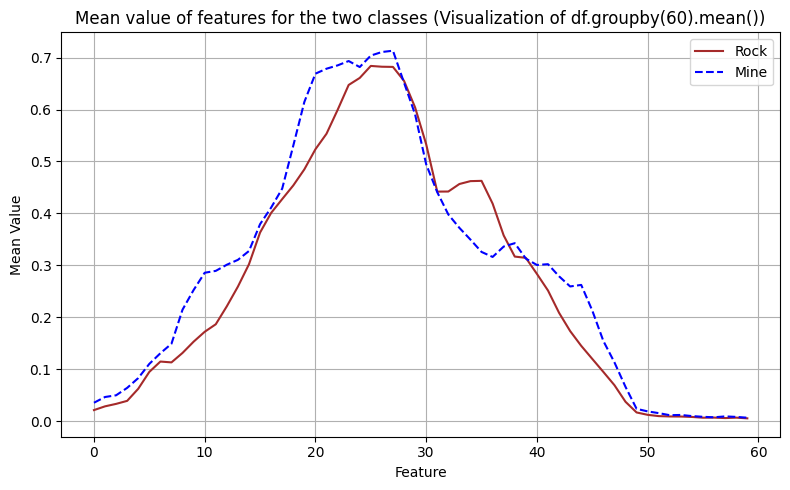

<Figure size 432x288 with 0 Axes>

In [20]:
df=pd.DataFrame(data_array)
plt.figure(figsize=(8,5),dpi=100) 
plt.plot(np.array(df.groupby(60).mean())[1], label='Rock', color='brown')
#plt.errorbar(x=np.arange(0,60),y=np.array(data.groupby(60).mean())[1],yerr=np.array(data.groupby(60).std())[1],fmt="")
plt.plot(np.array(df.groupby(60).mean())[0], label='Mine', color='blue', linestyle='--')
#plt.errorbar(x=np.arange(0,60),y=np.array(data.groupby(60).mean())[0],yerr=np.array(data.groupby(60).std())[0],fmt="")
plt.legend()
plt.title('Mean value of features for the two classes (Visualization of df.groupby(60).mean())')
plt.xlabel('Feature')
plt.ylabel('Mean Value')
plt.tight_layout()
plt.grid()
plt.show()
plt.tight_layout()

#### The data are already Normalized. No particular conclusions can be made from the Box Plots. 

### Correlation matrix plots

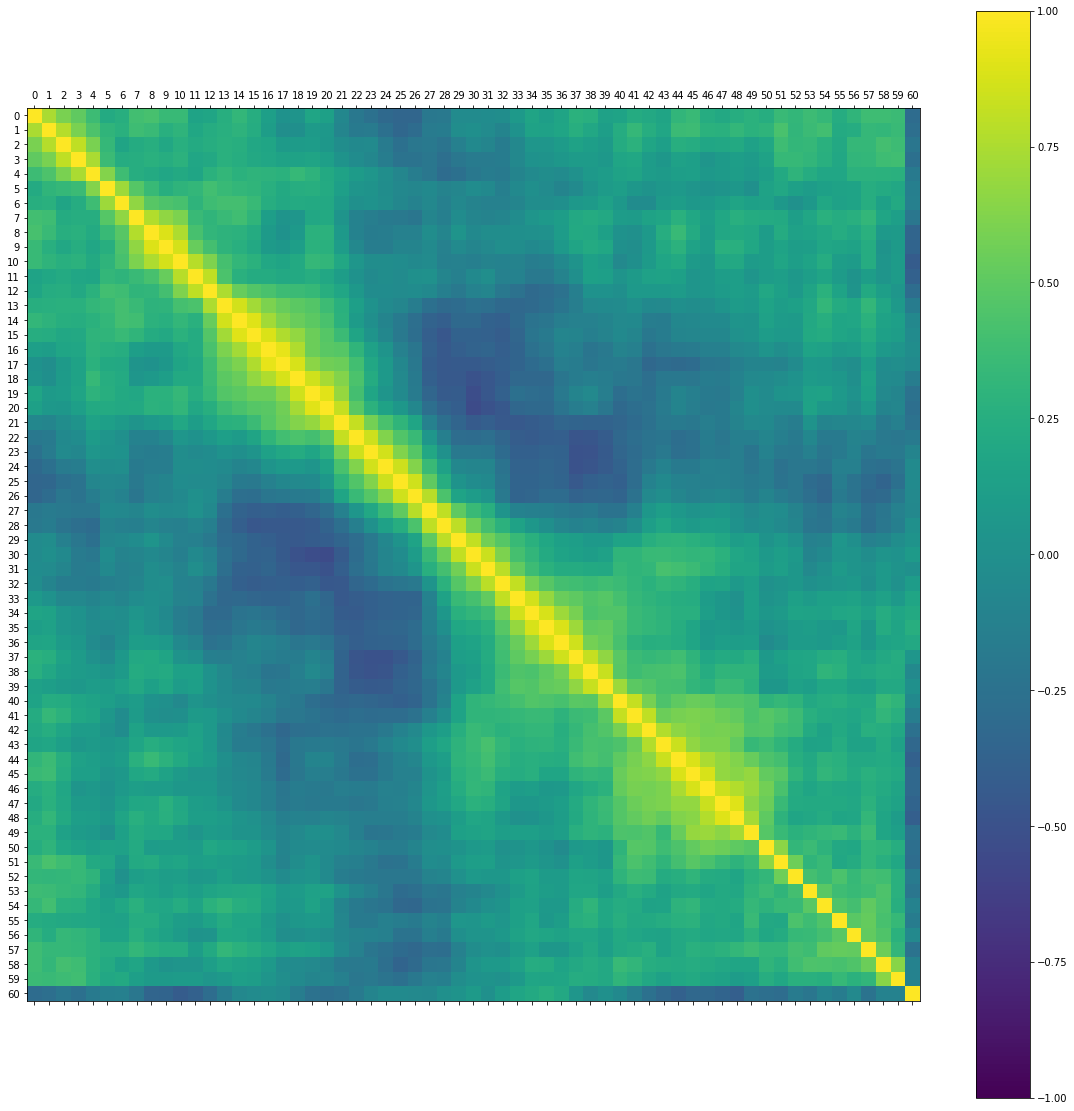

<Figure size 432x288 with 0 Axes>

In [21]:
correlations = df.corr()
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,61,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
#ax.set_xticklabels(names)
#ax.set_yticklabels(names)
plt.show()
plt.tight_layout()

By eyes it seems that there are several features highly correlated. However with so many features is hard to say. 

Zoom In :

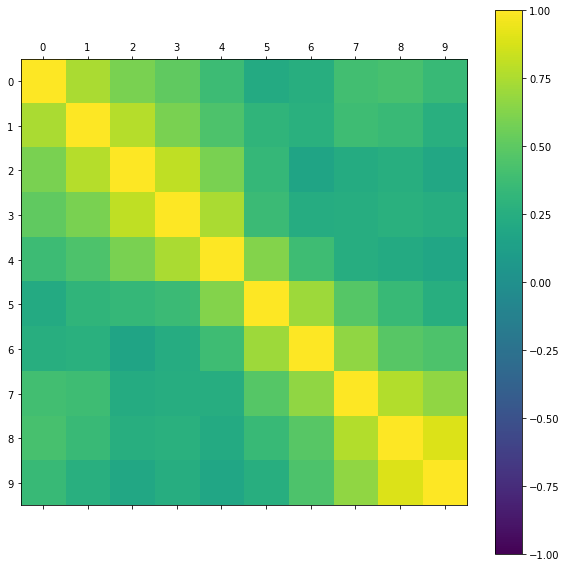

In [23]:
correlations = pd.DataFrame(X_train[:,:10]).corr()
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,10,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
plt.show()